# Microscopic View of Entropy

## Motivation

In classical Thermodynamics, entropy is introduced as another state function and/or as a partial derivative of the internal energy, or as something that can be used to indicate spontaneous processes.  Here we look at a more molecular/statistical explanation of what entropy is.

## Learning goals

After this class, students should be able to:

1. Describe what how entropy can drive certain outcomes
2. Compute entropy of a simple lattice gas
3. Compute the entropy of mixing lattice gasses

## Coding Concepts

1. Functions
2. Numpy
3. Scipy

## Example: Galton Board

To see how entropy, or disorder, plays a role in determining outcome let us consider the example of a galton board.  In a Galton Board, balls are dropped from the top, through a peg board, finally landing in different bins on the bottom.  This is likely familiar to you as a gameshow style game. 

In the case of a Galton board, it is the gravitational potential energy difference between the top and the bottom that causes the balls to fall.  There is no difference in potential energy, however, between any of the bins at the bottom.  So why are certain bins (middle ones) favored?

<img src="GaltonPuzzle_8Bin-Board.jpg" width="250" align="center">

The reason is because the are more paths for the balls to get to the central bins than to the bins on the edge.  You might recognize this as a bionomial process or the Fibonacci triangle.  Regardless, the probability of the bins follow the binomial distribution.

If we consider a Galton board with just one peg and two bins, the probability of each bin is simple $0.5$.  More generally, the probability can be computed as:

$P_{bin} = \frac{\text{Number of paths to that bin}}{\text{Total number of paths}}$

In the case of a single peg, the are a total of two paths (left and right) and one path goes to the left (thus $P_{left} = \frac{1}{2}$ and one path goes to the right.

<img src="GaltonPuzzle_8Bin-Board.jpg" width="250" align="center">

If we go to the next level, there are two additional pegs followed by three bins at the bottom.  The probability of each bin is:

\begin{align}
P_{left} =& \frac{1}{4} \\
P_{left} =& \frac{2}{4} = \frac{1}{2} \\
P_{left} =& \frac{1}{4} 
\end{align}

Now, more generally, since these follow the binomal distribution, we can compute the probability of bin $i$ given that there are $n$ rows in the 

\begin{equation}
P^n_i = \frac{nCi}{\sum_j^n nCj}
\end{equation}

where $nCi$ is said as "$n$ choose $i$" and $nCi = \frac{n!}{(n-i)!i!}$.

## Entropy and Counting

So how does this relate to entropy?  Entropy is not just the number of ways to get a certain outcome nor is it the probability of a certain outcome.   It is, however, related to these quantities via the Boltzmann equation:

$S = k\ln\Omega$

where $k$ is the Boltzmann constant and $\Omega$ is the number of ways of arranging the system.

As a note, it is somtimes written $S=k\ln W$ where $W$ is substituted for $\Omega$.  There is no substantive difference between these equations.

## Lattice Gas

A lattice gas is a common example to see how the ideas of counting can be used to compute/estimate entropy for a molecular system.  We will uses these examples to estimate entropy of mixing, for example.  But we start by simply describing the lattice gas model.

Estimate the entropy of two molecules of an excluded volume gas in a fixed volume.

We currently have no tools that allow us to estimate the absolute entropy of a system (we might be able to compute change in entropy during a process)...

To estimate this, we consider the two molecules fixed in a 2D box (square):

<img src="gas.png" width="350" align="center">

The gas particles can move around but cannot overlap (finite volume).  So how many ways can we arrange them?  Currently, their motion is on a continuous space and not possible to count.  Instead, we discretize the space in some manner and say that the gas particles can occupy a single grid (or lattice) position

<img src="gas_lattice_gas.png" width="700" align="center">

Now, the number of ways of arranging the gas particles ($W$ or $\Omega$ in the Boltzmann equation) can be computed using the binomial coefficient

\begin{equation}
W = 16C2 = \frac{16!}{14! 2!} = 8\cdot15 = 120
\end{equation}

\begin{equation}
S = k\ln120
\end{equation}

In [1]:
import scipy.special
import numpy as np
scipy.special.binom(16,2)
k = 1.38e-23 # this is in units of J/K
print(k*np.log(scipy.special.binom(16,2)))

6.606738605039223e-23


### A Note on Units of $k$ (Boltzmann constant)

$k = 1.38\times10^{-23}$ $J/K$ is a typical value and units of $k$.  Note that this is an extremely small value and that it is on the order of magnitude of a single particle/molecule.  i.e. $10^{-23}$ when Avogadro's number is $10^{23}$.  

$k$ can be thought of as the molecular value of the gas constant.  So, if you want to compute a molar quantity, i.e. $J/(K\cdot mol)$, you would use $R = 8.314$ $J/(K\cdot mol)$ for $k$.

### Entropy of Mixing of Two (or more) Lattice Gasses

Given that we can now estimate the entropy of a lattice gas in a given volume, we can compute the change in entropy upon expansion, contraction or mixing of lattice gasses.

\begin{equation}
\Delta S = S_f - S_i = k\ln W_f - k \ln W_i = k\ln\left(\frac{W_f}{W_i}\right)
\end{equation}

### Example

Consider the system of two distinguishable excluded volume gasses initially separated by a barrier indicated by the dashed line.  Compute the change in entropy for the following system if the dashed line is made to be:

1. Permeable only to solid colored particles (semi-permeable)
2. Fully permeable

<img src="gas_mix.png" width="500" align="center">

Permeable only to solid particles from Side L.

We start writing the entropy of mixing as:

\begin{equation}
\Delta S = S_f - S_i = k\ln W_f - k\ln W_i = k\ln\left(\frac{W_f}{W_i}\right)
\end{equation}

So we need to compute $W_f$ and $W_i$.  We start with $W_i$:

\begin{align}
W_i =& W_L \cdot W_R \\
=& 12C6 \cdot 8C4 \\
=& 924 \cdot 70 = 64680
\end{align}

In [4]:
print(scipy.special.binom(12,6))
print(scipy.special.binom(8,4))
print(scipy.special.binom(12,6)*scipy.special.binom(8,4))

924.0
70.0
64680.0


Now for $W_f$.  There are many ways to correctly think about and compute the number of ways to arrange this system.  Here, I will consider the following decomposition

\begin{align}
W_f =& W_{solid} \cdot W_{open} 
\end{align}

$W_{open}$ is the number of ways to arrange the open circles.  Since the open circles cannot diffuse across the barrier, this is identical to the initial situation.  Thus, 

\begin{equation}
W_{open} = 8C4 = 70
\end{equation}

$W_{solid}$ is only slighty more complicated.  Since the barrier is permeable to the solid particles, they can diffuse across it.  Thus, nominally, the solid circles can be in any one of the 20 lattice positions.  But, we know that the open circles are occupying four of these lattice positions, so really the solid circles have 16 lattice positions to choose from. Thus, 

\begin{equation}
W_{solid} = 16C6 = 8008
\end{equation}

and

\begin{equation}
W_f = 560560
\end{equation}

In [5]:
print(scipy.special.binom(16,6))
print(scipy.special.binom(16,6)*scipy.special.binom(8,4))

8008.0
560560.0


Finally, we compute $\Delta S_{mix}$:

\begin{align}
\Delta S_{mix} &= k\ln\left(\frac{W_f}{W_i}\right) \\
&= k\ln\left(\frac{560560}{64680}\right)\\
&= k\ln\left(8.6666\right)\\
&\approx k\cdot 2.1595\\
&\approx 17.95 \quad J/(K\cdot mol)
\end{align}

In [1]:
import scipy.special
import math
import numpy as np
R = 8.314/1000/4.184
print(R*np.log(scipy.special.binom(24,6)/(scipy.special.binom(6,3)*scipy.special.binom(9,3))))
print(R*np.log(24**6/math.factorial(6)/(6**3/math.factorial(3)*9**3/math.factorial(3) ) ))

0.008710393210266693
0.008158288494584824


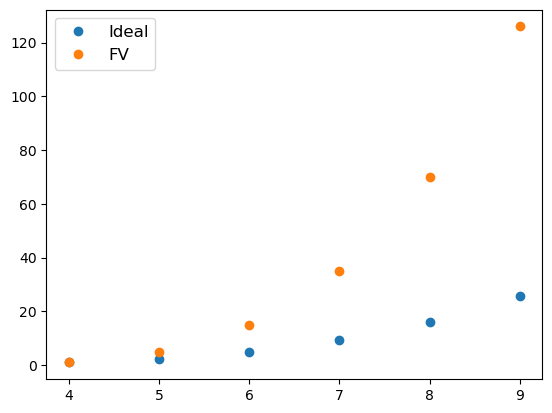

In [2]:
import math
import scipy.special
import matplotlib.pyplot as plt
def ideal(N,M):
    return M**N/math.factorial(N)
def fv(N,M):
    return scipy.special.binom(M,N)

N=4
mvals = np.arange(N,10,1)

plt.plot(mvals,ideal(N,mvals)/ideal(N,N),'o',label="Ideal")
plt.plot(mvals,fv(N,mvals)/fv(N,N),'o',label="FV")
#plt.plot(mvals,ideal(N,mvals)/fv(N,mvals),"o")
plt.legend(fontsize=12)

In [6]:
k=1.38e-23

print(k*np.log(ideal(5,27)/(ideal(3,9)*ideal(2,9))))
print(k*np.log(fv(5,27)/(fv(3,9)*fv(2,9))))

4.402857363478174e-23
4.5326511172237e-23


In [10]:
print(ideal(5,27)/fv(5,27))
print(ideal(3,9)*ideal(2,9)/(fv(3,9)*fv(2,9)))

1.4811622073578596
1.6272321428571428


In [4]:
print(ideal(3,9),ideal(3,18))
print(8.314/1000/4.184*np.log(ideal(3,18)/ideal(3,9)))


121.5 972.0
0.004132045166712752


In [5]:
print(fv(3,9),fv(3,18))
print(8.314/1000/4.184*np.log(fv(3,18)/fv(3,9)))

84.0 816.0
0.004517851357932188
